In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/model-v6-23/model_v6_23.hdf5
/kaggle/input/face-model1/face_model.h5
/kaggle/input/celebrity/c41.jpg
/kaggle/input/celebrity/c14.jpg
/kaggle/input/celebrity/c4.jpg
/kaggle/input/celebrity/c5.jpg
/kaggle/input/celebrity/c32.jpg
/kaggle/input/celebrity/c1.jpg
/kaggle/input/celebrity/c15.jpg
/kaggle/input/celebrity/c43.jpg
/kaggle/input/celebrity/c38.jpg
/kaggle/input/celebrity/c40.jpg
/kaggle/input/celebrity/c6.jpg
/kaggle/input/celebrity/c21.jpg
/kaggle/input/celebrity/c3.jpg
/kaggle/input/celebrity/c44.jpg
/kaggle/input/celebrity/c13.jpg
/kaggle/input/celebrity/c25.jpg
/kaggle/input/celebrity/c22.jpg
/kaggle/input/celebrity/c12.jpg
/kaggle/input/celebrity/c11.jpg
/kaggle/input/celebrity/c23.jpg
/kaggle/input/celebrity/c33.jpg
/kaggle/input/celebrity/c42.jpg
/kaggle/input/celebrity/c31.jpg
/kaggle/input/celebrity/c37.jpg
/kaggle/input/celebrity/c35.jpg
/kaggle/input/celebrity/c36.jpg
/kaggle/input/celebrity/c16.jpg
/kaggle

In [2]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 30 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=43da01676258d5c77e953b4de941fd501123ab5cb5fe22278ba5398fee7eeb09
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

Using TensorFlow backend.


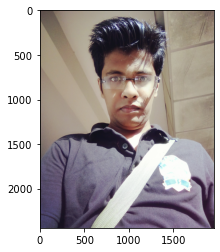

In [4]:
image1 = Image.open("/kaggle/input/neutral-i/IMG_20161104_100453.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [5]:
image = face_recognition.load_image_file("/kaggle/input/neutral-i/IMG_20161104_100453.jpg")

face_locations = face_recognition.face_locations(image)

In [6]:
face_locations

[(576, 1315, 1242, 650)]

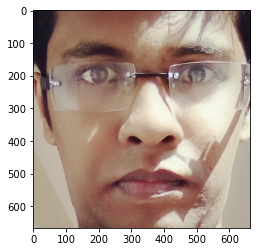

In [7]:

top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")


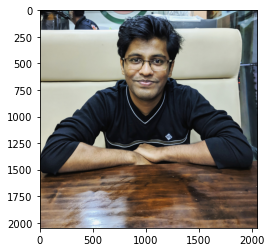

In [8]:
image2 = Image.open("/kaggle/input/herotik/a3.jpg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

In [9]:
image2 = face_recognition.load_image_file("/kaggle/input/herotik/a3.jpg")

face_locations2 = face_recognition.face_locations(image2)

In [10]:
face_locations2

[(348, 1221, 811, 759)]

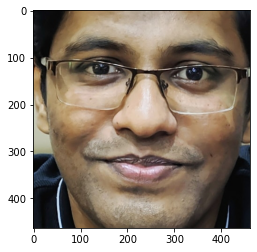

In [11]:
top, right, bottom, left = face_locations2[0]
face_image2 = image2[top:bottom, left:right]
plt.imshow(face_image2)
image_save2 = Image.fromarray(face_image2)
image_save2.save("image_2.jpg")


In [12]:
image1 = face_recognition.load_image_file("/kaggle/working/image_1.jpg")
image2 = face_recognition.load_image_file("/kaggle/working/image_2.jpg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

In [13]:
print (results)

[True]


In [14]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

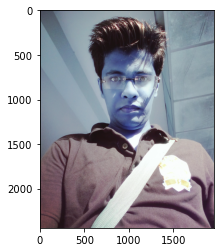

In [15]:
face_image  = cv2.imread("/kaggle/input/neutral-i/IMG_20161104_100453.jpg")
plt.imshow(face_image)

In [16]:
print (face_image.shape)


(2440, 1952, 3)


In [17]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [18]:
model = load_model("/kaggle/input/face-m/face_m.h5")

In [19]:
print (face_image.shape)

(1, 48, 48, 1)


In [20]:
predicted_class = np.argmax(model.predict(face_image))

In [21]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [22]:
print(predicted_label)

Neutral


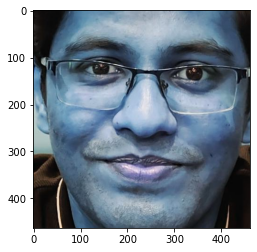

In [23]:
face_image  = cv2.imread("/kaggle/working/image_2.jpg")
plt.imshow(face_image)

In [24]:
print (face_image.shape)


(463, 462, 3)


In [25]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [26]:
print (face_image.shape)

(1, 48, 48, 1)


In [27]:
predicted_class = np.argmax(model.predict(face_image))

In [28]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [29]:
print(predicted_label)

Happy
